# Experimentando con JamboTubos
## Implementación en C++ 💪💪
Let's get this show on the road


Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [1]:
!cd .. && git submodule init
!cd .. && git submodule update
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd .. && make all
!cp ../build/ContarPalabras ./ContarPalabras

mkdir: build: File exists
g++ -std=c++11 -Wall -c src/HashMapConcurrente.cpp -o build/HashMapConcurrente.o -lpthread
clang: warning: -lpthread: 'linker' input unused [-Wunused-command-line-argument]
g++ -std=c++11 -Wall -c src/CargarArchivos.cpp -o build/CargarArchivos.o -lpthread
clang: warning: -lpthread: 'linker' input unused [-Wunused-command-line-argument]
g++ -std=c++11 -Wall -o build/ContarPalabras src/ContarPalabras.cpp build/HashMapConcurrente.o build/CargarArchivos.o -lpthread
rm build/CargarArchivos.o build/HashMapConcurrente.o


In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import clear_output
from subprocess import call, check_output
from IPython.display import Markdown, display
from datetime import datetime, timedelta
import random
import numpy as np

def printmd(string):
    display(Markdown(string))

printmd("### Para ejecutar el programa")
printmd("usar: ```call([\"./ContarPalabras\", \"args\", \"to\", \"execute\"])```")
printmd("Ejemplo: ```call([\"./ContarPalabras\", \"1\", \"1\", \"data/test-1\"])```")
    
printmd("### ✨Además, tenemos unas hermosas tools para testeo")
printmd("Si hacemos iteraciones en algún test, podemos wrappear el range con ```logProgress```.")
printmd("\n**Ejemplo:** ```for i in logProgress(range(0, algo.size), name=\"Lo que representan mis índices\")```")
printmd("Esto es útil nada más para cosas que toman tiempo cuantificable :P (básicamente, no instantáneo)")

printmd("\nSi no nos interesa el output de una celda en particular (porque, por ejemplo, la usamos para carga de datos en el notebook), podemos ejecutar ```clear_output()\ndone()```")
printmd("al final de la misma.")

### Para ejecutar el programa

usar: ```call(["./ContarPalabras", "args", "to", "execute"])```

Ejemplo: ```call(["./ContarPalabras", "1", "1", "data/test-1"])```

### ✨Además, tenemos unas hermosas tools para testeo

Si hacemos iteraciones en algún test, podemos wrappear el range con ```logProgress```.


**Ejemplo:** ```for i in logProgress(range(0, algo.size), name="Lo que representan mis índices")```

Esto es útil nada más para cosas que toman tiempo cuantificable :P (básicamente, no instantáneo)


Si no nos interesa el output de una celda en particular (porque, por ejemplo, la usamos para carga de datos en el notebook), podemos ejecutar ```clear_output()
done()```

al final de la misma.

In [88]:
def logProgress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )
        
def logSecondaryProgress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

#     if is_iterator:
#         progress = IntProgress(min=0, max=1, value=1)
#         progress.bar_style = 'info'
#     else:
#         progress = IntProgress(min=0, max=size, value=0)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    writeDeletingLastLine('{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    ))
                else:
#                     progress.value = index
                    writeDeletingLastLine(u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    ))
            yield record
    except:
#         progress.bar_style = 'danger'
        raise
    else:
#         progress.bar_style = 'success'
#         progress.value = index
        writeDeletingLastLine("{name}: {index}".format(
            name=name,
            index=str(index or '?')
        ))
        
def done():
    print("Done!\n\n✨\n  ⊂_ヽ\n 　 ＼＼ \n　　 ＼( ͡° ͜ʖ ͡°)\n　　　 >　⌒ヽ\n　　　/ 　 へ＼\n　　 /　　/　＼＼\n　　 ﾚ　ノ　　 ヽ_つ\n　　/　/\n　 /　/|\n　(　(ヽ\n　|　|、＼\n　| 丿 ＼ ⌒)\n　| | 　　) /\nノ )　　Lﾉ\n(_／)")

In [84]:
# def logTimeForInstance(time, instanceSize):
#     timeScale = ""
#     if time / 1000 / 60 / 60 >= 1:
#         timeScale = "hs"
#         time = time / 1000 / 60 / 60
#     elif time / 1000 / 60 >= 1:
#         timeScale = "m"
#         time = time / 1000 / 60
#     elif time / 1000 >= 1:
#         timeScale = "s"
#         time = time / 1000
#     else:
#         timeScale = "ms"
#         time = time
#     # Los espacios al final es porque usar \r hace que se pise la línea anterior,
#     # de no poner los espacios a veces no se pisa todo y queda rancio el output
#     print("Time taken for last instance (size = {}) was {} {}                        ".format(str(instanceSize), '%.2f' % time, timeScale), end="\r")

def writeDeletingLastLine(text):
    print("{}                                                                                                                                          ".format(text), end="\r")

## Ejemplo de ejecución

In [101]:
from decimal import *

threadsCarga = 1
threadsMaximo = 1
cantEjecuciones = 500

timeTakenCarga = 0
timeTakenMax = 0
solution = ""

for i in logProgress(range(0, cantEjecuciones), name="Ejecutando por vez"):
    result = check_output(["./ContarPalabras", str(threadsCarga), str(threadsMaximo), "data/test-1"]).decode("utf-8").split("\n")
    timeTakenCarga += Decimal(result[0])
    timeTakenMax += Decimal(result[1])
    if solution == "":
        solution = result[2]
    elif solution != "" and solution != result[2]:
        printmd("Houston, tenemos un problema. `{}` es distinto de `{}`".format(solution, result[2]))
        break

timeTakenCarga /= cantEjecuciones
timeTakenMax /= cantEjecuciones

printmd("## Resultado")
printmd("Se cargó en promedio en **{}** nanosegundos.".format(timeTakenCarga))
printmd("Se obtuvo el máximo en promedio en **{}** nanosegundos.".format(timeTakenMax))
printmd("Con la entrada propuesta, la palabra con más cantidad de apariciones es **{}**.".format(solution))

## Resultado

Se cargó en promedio en **305214** nanosegundos.

Se obtuvo el máximo en promedio en **56710** nanosegundos.

Con la entrada propuesta, la palabra con más cantidad de apariciones es **estegosaurio 2**.

## Análisis de cantidad de threads - carga

In [182]:
from decimal import *

maxThreadsCarga = 10
threadsMaximo = 1
cantEjecuciones = 10

timeTakenCarga = 0
timeTakenMax = 0
solution = ""

soluciones = []
tiemposCarga = []
tiemposMax = []
cantThreadsCarga = []

for threadsCarga in logProgress(range(1, maxThreadsCarga + 1), name="Ejecutando para cantidad de threads de carga"):
    for i in logSecondaryProgress(range(0, cantEjecuciones), name="Ejecutando por vez"):
        result = check_output(["./ContarPalabras", str(threadsCarga), str(threadsMaximo), "data/corpus"]).decode("utf-8").split("\n")
        timeTakenCarga += Decimal(result[0])
        timeTakenMax += Decimal(result[1])
        if solution == "":
            solution = result[2]
        elif solution != "" and solution != result[2]:
            printmd("Houston, tenemos un problema. `{}` es distinto de `{}`".format(solution, result[2]))
            break

    timeTakenCarga /= cantEjecuciones
    timeTakenMax /= cantEjecuciones
    
    soluciones += [solution]
    tiemposCarga += [timeTakenCarga]
    tiemposMax += [timeTakenMax]
    cantThreadsCarga += [threadsCarga]

clear_output()
done()

Done!

✨
  ⊂_ヽ
 　 ＼＼ 
　　 ＼( ͡° ͜ʖ ͡°)
　　　 >　⌒ヽ
　　　/ 　 へ＼
　　 /　　/　＼＼
　　 ﾚ　ノ　　 ヽ_つ
　　/　/
　 /　/|
　(　(ヽ
　|　|、＼
　| 丿 ＼ ⌒)
　| | 　　) /
ノ )　　Lﾉ
(_／)


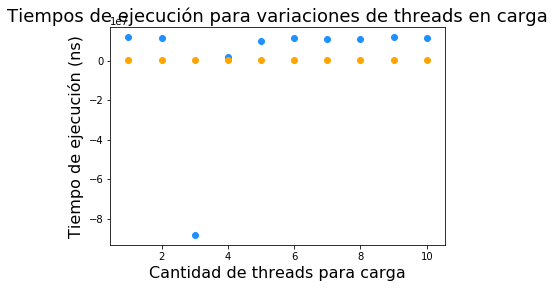

In [183]:
## Plot para complejidad de FB
fig = plt.figure()
plt.scatter(cantThreadsCarga, tiemposCarga, c='dodgerblue')
plt.scatter(cantThreadsCarga, tiemposMax, c='orange')
# plt.plot(xs, realYs, 'forestgreen')

plt.xlabel("Cantidad de threads para carga", fontsize=16)
plt.ylabel("Tiempo de ejecución (ns)", fontsize=16)
plt.title("Tiempos de ejecución para variaciones de threads en carga", fontsize=18)

# real_patch = mpatches.Patch(color='dodgerblue', label='Tiempos de carga')
# predict_patch = mpatches.Patch(color='orange', label='Tiempos de máximo')
# real_patch = mpatches.Patch(color='forestgreen', label='Real')

# plt.legend(handles=[real_patch, predict_patch], loc="upper left")
plt.show()

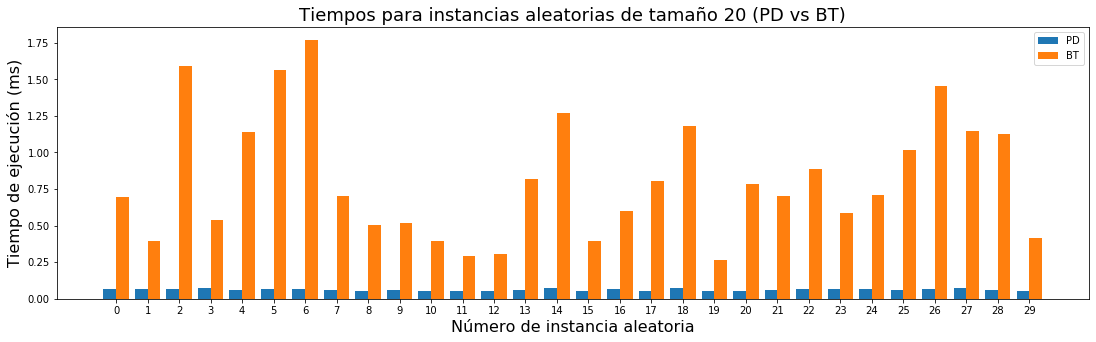

In [202]:
x = np.arange(len(pdrand_ns))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 5)
rects1 = ax.bar(x - width / 2, pdrand_tiempos, width, label='PD')
rects2 = ax.bar(x + width / 2, btrand_tiempos, width, label='BT')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel("Número de instancia aleatoria", fontsize=16)
plt.ylabel("Tiempo de ejecución (ms)", fontsize=16)
plt.title("Tiempos para instancias aleatorias de tamaño {} (PD vs BT)".format(n), fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(pdrand_ns)
ax.legend()

plt.show()